In [23]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl

# Table of Contents
>## 1. Algorithm
## 2. Sigmoid Functions
## 3. More about Logistic Function
## 4. Linear Decision Function
## 5. MLE
## 6. Numerical Optimization
## 7. Normalization
## 8. Performance Metric
## 9. Logistic Regression in `Statsmodels`
## 10. Logistic Regression in `Scikit-Learn`
## 11. Example - Micheling Guide Rating Prediction

## 1.  Algorithm
* **Regression**
  * Use when `0 <= y <= N`
  * $ p(y \mid x) = \text{Bin} (y \mid \theta(x), N) $
* **Classification**
  * Use when `y = 0 or 1`
  * $ p(y \mid x) = \text{Bern} (y \mid  \theta(x) )$
* **Algorithm**
  
$$ \hat{y} = \begin{cases} 1 & \text{ if } \theta(x) \geq 0.5 \\ 0 & \text{ if } \theta(x) < 0.5 \end{cases} $$

## 2. Sigmoid Functions
* Definition
  * Bounded, Differentiable, Real function that is
  * Defined for all real input values and
  * Has a non-negative derivative at each point

### Frequently Used Sigmoid Functions
* Logistic Function
$$ \text{logitstic}(z) = \sigma(z) = \dfrac{1}{1+\exp{(-z)}} $$
* Hyperbolic Tangent
$$ \tanh(z) = \frac{\sinh z}{\cosh z} = \frac {e^z - e^{-z}} {e^z + e^{-z}} = 2 \sigma(2x) - 1$$
* Error Function
$$ \text{erf}(z) = \frac{2}{\sqrt\pi}\int_0^z e^{-t^2}\,dt $$

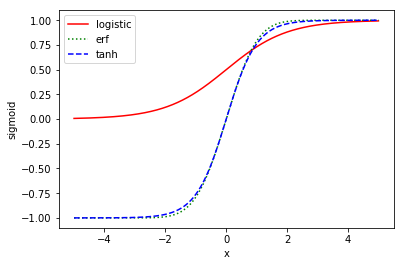

In [18]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="logistic")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="erf")
plt.plot(xx, np.tanh(xx), 'b--', label="tanh")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.ylabel("sigmoid")
plt.show()

## 3. More about Logistic Function
$$ \theta=p(x=1) $$
* Odds ratio
$$ \text{odds ratio} = \dfrac{\theta}{1-\theta} $$
* Logit function ($-\infty < 0 < \infty$)
$$ z = \text{logit}(\text{odds ratio}) = \log \left(\dfrac{\theta}{1-\theta}\right) $$ 
* Logistic function
$$ \text{logitstic}(z) = \theta(z) = \dfrac{1}{1+\exp{(-z)}} $$  

## 4. Linear Decision Function

* $z$: decision function
  * $z = 0 \rightarrow \theta = 0.5$
  * $z > 0 \rightarrow \theta > 0.5$
  * $z < 0 \rightarrow \theta < 0.5$


* In logistic regresion,  


$$ z = w^Tx  $$


$$ \theta(x) = \dfrac{1}{1+\exp{(-w^Tx)}} $$  



## 5. MLE

* Estimate $w$ using MLE(Maximum Likelihood Estimation)
* Assume $y$ is Bernoulli random variable,

$$
p(y \mid x) = \text{Bern} (y \mid  \theta(x;w) )
$$

* And

$$
\theta(x;w) = \dfrac{1}{1 + \exp{(-w^Tx)}}
$$

* Log Likelihood (data: $\{ x_i, y_i \}_{1:N}$)

$$
\begin{eqnarray}
\text{LL} 
&=& \log \prod_{i=1}^N \theta_i(x_i;w)^{y_i} (1-\theta_i(x_i;w))^{1-y_i} \\
&=& \sum_{i=1}^N \left( y_i \log\theta_i(x_i;w) +  (1-y_i)\log(1-\theta_i(x_i;w)) \right) \\
&=& \sum_{i=1}^N \left( y_i \log\left(\dfrac{1}{1 + \exp{(-w^Tx_i)}}\right) + (1-y_i)\log\left(\dfrac{\exp{(-w^Tx_i)}}{1 + \exp{(-w^Tx_i)}}\right) \right) \\
\end{eqnarray}
$$

* Differentiate

$$ \dfrac{\partial\text{LL}}{\partial w}  = \sum_{i=1}^N \dfrac{\partial\text{LL}}{\partial \theta_i(x_i;w)} \dfrac{\partial\theta_i(x_i;w)}{\partial w} $$

$$ 
\dfrac{\partial \theta_i(x_i;w)}{\partial w} 
= \dfrac{\partial}{\partial w} \dfrac{1}{1 + \exp{(-w^Tx_i)}} \ 
= \dfrac{\exp{(-w^Tx_i)}}{(1 + \exp{(-w^Tx_i)})^2} x_i \ 
= \theta_i(x_i;w)(1-\theta_i(x_i;w)) x_i 
$$

$$
\dfrac{\partial\text{LL}}{\partial \theta_i(x_i;w)} =  \left( y_i \dfrac{1}{\theta_i(x_i;w)} - (1-y_i)\dfrac{1}{1-\theta_i(x_i;w)} \right) 
$$

$$ 
\begin{eqnarray}
\dfrac{\partial \text{LL}}{\partial w} 
&=& \sum_{i=1}^N \left( y_i \dfrac{1}{\theta_i(x_i;w)} - (1-y_i)\dfrac{1}{1-\theta_i(x_i;w)} \right) \theta(x_i;w)(1-\theta(x_i;w)) x_i   \\
&=& \sum_{i=1}^N \big( y_i (1-\theta_i(x_i;w)) - (1-y_i)\theta_i(x_i;w)  \big)  x_i \\
&=& \sum_{i=1}^N \big( y_i  - \theta_i(x_i;w) \big) x_i \\
\end{eqnarray}
$$

* **Numerical Optimization** is required


## 6. Numerical Optimization

* Example) Steepest Gradient (with step size $\eta_k$)

$$
g_k = \dfrac{d}{dw}(-LL)
$$

$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} - \eta_k g_k \\
&=& w_{k} + \eta_k \sum_{i=1}^N \big( y_i  - \theta_i(x_i; w_k) \big) x_i\\
\end{eqnarray}
$$

## 7. Normalization
* Prevents overfitting
* Various penalty functions (Ridge, Lasso, Elastic net,...) can be used
* Example) Ridge Normalization

$$ J = -\text{LL} + \lambda w^Tw $$

## 8. Performance Metric
* Null Hypothesis : $ H_0: w_k = 0 $
* Calculate **Pseudo R Square**

$$
R^2_{\text{pseudo}} = 1 - \dfrac{G^2}{G^2_0} 
$$

* $G^2$: deviance
* $G^2_0$: deviance for null model

$$
G^2 = 2\sum_{i=1}^N \left( y_i\log\dfrac{y_i}{\hat{y}_i} + (1-y_i)\log\dfrac{1-y_i}{1-\hat{y}_i} \right)
$$

* Where,

$$
\hat{y}_i = \theta(x_i)
$$

## 9. Logistic Regression in `StatsModels`

In [19]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, 
                            n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

In [21]:
#from scipy import stats
#stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 29 Jun 2018   Pseudo R-squ.:                  0.7679
Time:                        01:53:09   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


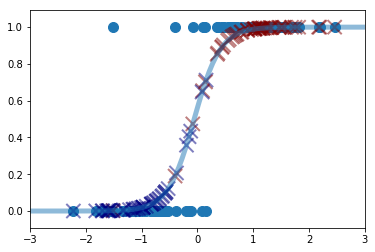

In [24]:
xx = np.linspace(-3, 3, 100)
theta = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, theta, lw=5, alpha=0.5)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, logit_res.predict(X), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

## 10. Logistic Regression in `Scikit-Learn`

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X0, y)

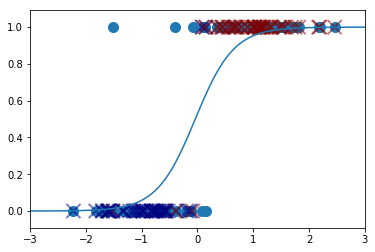

In [26]:
xx = np.linspace(-3, 3, 100)
theta = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))
plt.plot(xx, theta)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, model.predict(X0), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

## 11. Example - Micheling Guide Rating Prediction
* **Parameters**
  * InMichelin: 0 or 1
  * Restaurant Name
  * Food: 1 ~ 30
  * Decor: 1 ~ 30
  * Service: 1 ~ 30
  * Price: (USD)


In [28]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinNY.csv", 
                 encoding="latin1")
df.tail()

,InMichelin,Restaurant Name,Food,Decor,Service,Price
159,0,Terrace in the Sky,23,25,21,62
160,1,Tocqueville,25,21,24,65
161,1,Triomphe,25,22,22,65
162,0,Village,20,20,19,40
163,1,Vong,23,24,21,60


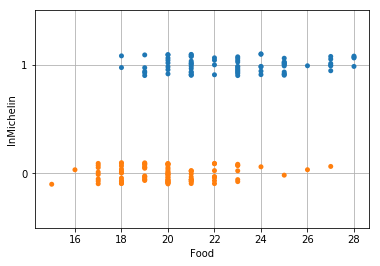

In [29]:
sns.stripplot(x="Food", y="InMichelin", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [30]:
model = sm.Logit.from_formula("InMichelin ~ Food + Decor + Service + Price", df)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             InMichelin   No. Observations:                  164
Model:                          Logit   Df Residuals:                      159
Method:                           MLE   Df Model:                            4
Date:                Fri, 29 Jun 2018   Pseudo R-squ.:                  0.3428
Time:                        02:06:14   Log-Likelihood:                -74.198
converged:                       True   LL-Null:                       -112.89
                                        LLR p-value:                 6.213e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1975      2.309     -4.850      0.000     -15.723      -6.672
Food           0.4048      0.131      3.080      0.002       0.147       0.662
Decor          0.1000      0.089      1.121      0.2

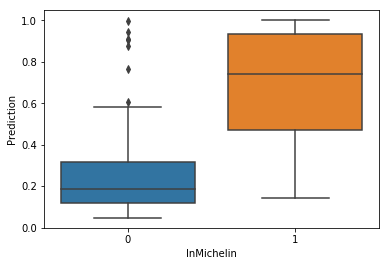

In [31]:
df["Prediction"] = result.predict(df)
sns.boxplot(x="InMichelin", y="Prediction", data=df)
plt.show()